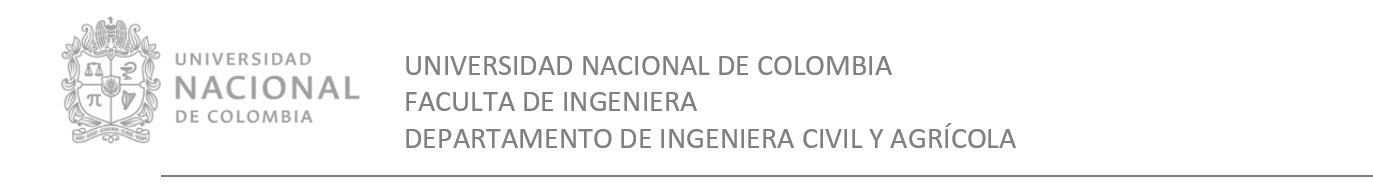

# **ANÁLISIS EXPLORATORIO Y TÉCNICAS BÁSICAS EN SEGURIDAD VIAL  - FUNCIONES DE DESEMPEÑO DE SEGRUDAD VIAL STF**
----------
*CATEDRA INTERNACIONAL DE INGENIERÍA.*

*CIUDADES INTELIGENTES Y ANALÍTICA DE DATOS*

*Facultad de Ingeniería*

*Departamento de Ingeniero Civil y Agrícola*

-------



## **0. ENTENDIMIENTO DEL NEGOCIO.**
-----------

La siniestralidad del transporte de carga es una de las principales preocupaciones en Europa, Estados Unidos y Colombia debido a que representa más del 15% de la siniestralidad de los países, el incremento de la siniestralidad con respecto al año anterior ha superado el 8% y en más del 80% de las fatalidades corresponde a otros actores viales diferentes a los ocupantes del vehículo de carga, donde principalmente fallecen peatones, ciclistas y motociclistas. La siniestralidad en las vías nacionales que cruzan por zonas urbanas ha sido poco estudiada y es una de las principales problemáticas de países de ingresos medios y bajos, por lo tanto, se requiere analizar dos grandes variables en la siniestralidad: el transporte de carga y el paso por zonas urbanas.

Los modelos espaciales de seguridad vial contemplan datos de siniestros viales, datos de tráfico y variables de diseño de la infraestructura vial. Generalmente se desarrollan como una ecuación de regresión simple (Safety Performance Function - SPF) donde la correlación espacial contempla múltiples variables en un mismo lugar. Los modelos existentes constituyen un punto de partida para desarrollar un modelo más confiable el cual puede ser calibrado con la modificación de los factores que influyen en los siniestros viales (Crash Modification Factors - CMF); posteriormente a la implementación del modelo, los tomadores de decisiones definen contramedidas por medio de los CMF que buscan intervenir las barreras que inciden en la siniestralidad vial, con el fin de mejorar los niveles de seguridad y reducir la cantidad y/o la severidad de los siniestros viales (Yannis, et al., 2016).

*El presente proyecto corresponde a un ejercicio práctico en el marco de la catedra de internacional de la faculta de ingeniería donde se explora la ciencia de datos en el marco de la seguridad vial, en este ejemplo, se explora la creación de FTS empleando modelos paramétricos GLM – Modelos Lineales Generalizados.*

### **0.1 Problema de Investigación**

---------

Al analizar la pandemia de la siniestralidad vial, en particular en el contexto de las ciudades del sur global, se evidencia la necesidad de aplicar los modelos y metodologías ya presentadas para el estudio de la problemática de predicción de las tasas y frecuencia de siniestros viales en el contexto de la red vial arterial en la ciudad de Bogotá, modelando la causalidad y/o aporte de las diferentes variables explicativas o de riesgo en las tasas de accidentalidad y teniendo en cuenta la correlación espacial existente en el análisis de la siniestralidad, problema al cual se pretende dar respuesta en el desarrollo de la presente investigación.

### **0.2 Hipótesis**
------------

Se espera que la metodología y los modelos realizado para la predicción del número de siniestros, permita identificar los factores y las variables que caracterizan las tasas de siniestros con alta precisión estadística (variables como: volúmenes vehiculares, composición de vehículos pesados, características de la infraestructura, variación promedio de las velocidades, entre otras), y la aplicación de los modelos de probabilidad, permita predecir de manera satisfactoria las tasas de eventos ocurridos y la frecuencia de siniestros en la red arterial de la ciudad de Bogotá.


### **0.3 Pregunta de Investigación**

--------

¿Cuáles son los factores de riesgo y las variables que explican de manera más significativa la siniestralidad en los tres diferentes escenarios de la ciudad de Bogotá? Y ¿Es posible construir una función de desempeño de seguridad vial SPF y cuál será su poder de predicción al ser con un conjunto de pruebas?

### **0.4 Objetivo General**

-------
•	Estimar funciones de desempeño de seguridad vial a partir de modelos multivariados de los siniestros y calibrados para el escenario estudiado, que permitan estimar de manera adecuada la ocurrencia de siniestros viales, aplicando técnicas de regresión multivariadas y validación cruzada en la evaluación del desempeño de los modelos.

#### **0.4.1 Objetivos especificos**

-------


*   Aplicar la metodología CRISP-DM para el análisis de datos en un escenario practico.
*   Repasar algunos de los conceptos teóricos vistos en la sesión anterior.
*   Entender el conjunto de datos aplicando técnicas de estadística descriptiva y entendimiento del negocio.
*   Entender la importancia de la identificación de variables claves y el proprocesamiento de estas.
*   Entrenar y evaluar una FPS en el contexto de la siniestralidad en Bogotá.




In [1]:
print('Hola Mundo')

Hola Mundo


### **0.5 Libreria de Datos**
------------------------


| Variable | Descripción                                                                         | Tipo de variable |
| -------- | ----------------------------------------------------------------------------------- | ---------------- |
| SIN      | Número de siniestros por kilometro                                                  | int64            |
| ADTPH    | Volumen vehicular promedio diario en hora pico                                      | int64            |
| P_MOTO   | Porcentaje de vehículos tipo automóviles con respecto al TPHD.                      | float64          |
| P_CAR    | Porcentaje de vehículos tipo motocicleta con respecto al TPHD.                      | float64          |
| P_BUS    | Porcentaje de vehículos tipo bus con respecto al TPHD.                              | float64          |
| P_TRUCK  | Porcentaje de vehículos tipo camión con respecto al TPHD.                           | float64          |
| VEL      | Promedio de la velocidad media diaria en el segmento.                               | float64          |
| VELSD    | Desviación estándar de la velocidad media diaria en el segmento.                    | float64          |
| CURV     | Curvatura promedio del segmento medido en grados                                    | float64          |
| CURVSD   | Desviación estándar de la curvatura promedio del segmento                           | float64          |
| GRAD     | Gradiente vertical promedio del segmento medido en porcentaje                       | float64          |
| GRADSD   | Desviación estándar del gradiente promedio del segmento                             | float64          |
| CARR     | Numero promedio de carriles por sección del segmento                                | int64            |
| RIGID    | Presencia de pav Rigido = 1                                                         | Bool             |
| FLEX     | Presencia de pav Flexible = 1                                                       | Bool             |
| MIX      | Presencia de pav Mixt = 1                                                           | Bool             |
| INT      | Numero de intersecciones no semaforizadas por kilometro                             | float64          |
| SIGINT   | Numero de intersecciones semaforizadas por kilometro                                | float64          |
| SIDWAL   | Ancho promedio de anden peatonal por segmento.                                      | float64          |
| PVEH     | Existencia de puentes vehiculares en el segmento (1=si, 0=no)                       | Bool             |
| PPEAT    | Existencia de puentes peatonales en el segmento (1=si, 0=no)                        | Bool             |
| CICLO    | Presencia de Cicloruta en el segmento (1=si, 0=no)                                  | Bool             |
| LUM      | Numero de postes de luz en los segmentos por kilometro                              | float64          |
| RSITP    | Número de rutas de transporte público colectivo en el segmento                      | int64            |
| PSITP    | Existencia de paraderos de Transporte público colectivo en el segmento (1=si, 0=no) | float64          |
| RTRON    | Número de rutas de Transporte público masivo en el segmento                         | int64            |
| ESTM     | Existencia de estaciones de transporte público masivo en el segmento (1=si, 0=no)   | Bool             |
| RALIM    | Número de rutas del sistema alimentados al transporte público masivo.               | int64            |
| COMUS    | Área de uso de suelo comercial adyacente al segmento por kilómetro                  | float64          |
| RESIUS   | Área de uso de suelo residencial adyacente al segmento por kilómetro                | float64          |

## **0.6 Visualizacion de la Siniestralidad**
.................

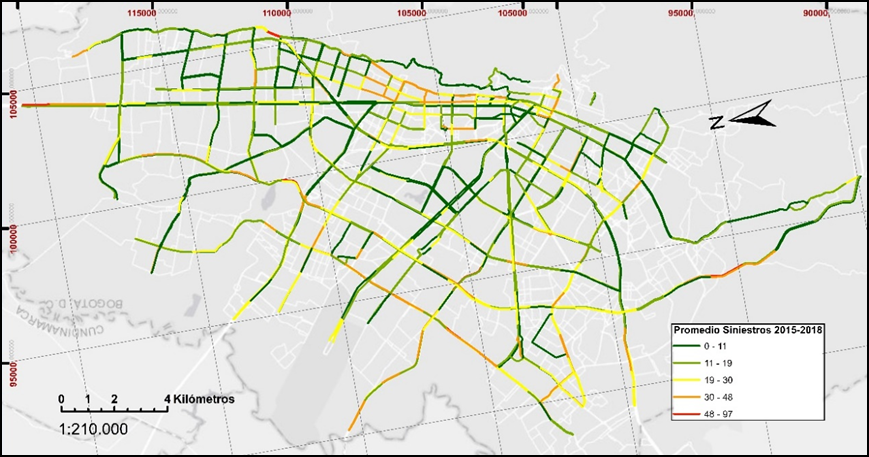


## **1. DEPENDENCIAS**
---

Importamos las librerías necesarias y definimos algunas funciones básicas de visualización que vamos a usar en algunos ejemplos.

-----------

In [ ]:
# Se realiza la instalación de las librerias necesarias por actualizar o instalar
!pip install geodatasets

# Actualizamos scikit-learn a la última versión
!pip install -U scikit-learn

# Actualizamos statsmodels a la última versión
!pip install statsmodels tqdm

In [ ]:
# --- Manipulación de datos ---
import pandas as pd
import numpy as np
import os
import re
import math

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl

# --- Google Colab (solo si se usa en Colab) ---
from google.colab import drive  # Montar Google Drive

# --- Preprocesamiento y modelos (scikit-learn) ---
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans

# --- Modelado estadístico (statsmodels) ---
import statsmodels.api as sm
import statsmodels.formula.api as smf

# --- Utilidades ---
from tqdm import tqdm

In [ ]:
# Configuraciones para las librerías y módulos usados.

# Ignoramos las advertencias o warnings.
import warnings
warnings.simplefilter(action='ignore')

# Configuramos el formato por defecto de la
# librería de visualización Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)
sns.set_theme()

### **1.2. Funciones de utilidad y visualización**
---

Para ilustrar los ejemplos discutidos en este material utilizaremos algunas funciones que permiten visualizar de manera general los datos, junto a las funciones de predicción obtenidas con cada modelo.


In [ ]:
def IQR(column):
    q25, q75 = column.quantile([0.25, 0.75])
    return q75-q25

In [ ]:
def range_f(column):
    return column.max() - column.min()

In [ ]:
stats_list = [
    range_f, # custom function
    'median',
    'sum','skew','kurt',
    'var', # numpy function
    IQR   # custom function
]

In [ ]:
def remove_multiple_elements(my_list, values_to_remove):
    """
    Removes all occurrences of multiple values from a list.

    Args:
        my_list: The original list.
        values_to_remove: A list of values to remove from my_list.

    Returns:
        A new list with the specified values removed.
    """
    return [item for item in my_list if item not in values_to_remove]

In [ ]:
def fit_model(X_sub, y_sub):
    X_sub = sm.add_constant(X_sub, has_constant='add')
    model = sm.GLM(y_sub, X_sub, family=sm.families.NegativeBinomial())
    result = model.fit()
    return result

In [ ]:
def stepwise_selection(X, y, threshold_in=0.01, threshold_out=0.05, verbose=False):
    included = []
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            try:
                model = fit_model(X[included + [new_col]], y)
                new_pvals[new_col] = model.pvalues.get(new_col, np.nan)
            except:
                continue
        best_pval = new_pvals.min()
        if best_pval is not np.nan and best_pval < threshold_in:
            best_feature = new_pvals.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f' + {best_feature}')
        # backward step
        model = fit_model(X[included], y)
        pvals = model.pvalues.iloc[1:]  # sin constante
        worst_pval = pvals.max()
        if worst_pval > threshold_out:
            worst_feature = pvals.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f' - {worst_feature}')
        if not changed:
            break
    return included


In [ ]:
# Gráfica de la varianza explicada acumulada.

def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n° de componentes principales',
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)
  plt.show()

### **1.3. Cargue de la base de datos**
---

Se carga la base de datos que se va a utilizar para el análisis


In [ ]:
df=pd.read_excel('/content/Practica_1_Siniestros.xlsx',sheet_name='Sheet1')

In [ ]:
df.head()

,LLAVE,TID,TRAMO,CORREDOR,TYPE,LON_TRAMO,SIN,TPDH,P_MOTO,P_AUTO,...,UCOM,URESI,LUM,AÑO,TRONCAL,SEC_TRON,CARRIL_PRE,NOM_CARRIL,ALIMENT,SEC_ALIMEN
0,0,1000335,AV.CARACAS;KR10,CL11SUR,12,628.945969,0,262,0.217973,0.453155,...,0.000000,40.206916,54.753452,2014,0,NaN,0,NaN,0,NaN
1,1,1000089,CL134;CL140,KR7,59,502.109523,7,722,0.084488,0.502770,...,0.000000,13.711740,19.729151,2014,0,NaN,0,NaN,0,NaN
2,2,1000221,KR15;KR19,CL147,16,463.498457,4,100,0.045226,0.396985,...,0.350840,56.965401,54.686822,2014,0,NaN,0,NaN,0,NaN
3,3,1000309,CL24;CL19,AV.CIRCUNVALAR,4,523.757896,9,492,0.130081,0.815041,...,21.209919,60.991939,66.434283,2014,0,NaN,0,NaN,0,NaN
4,4,1000665,AV.P.MAYO;CL27S,KR10,45,545.660606,7,464,0.209277,0.248652,...,4.364013,21.365427,15.896330,2014,0,NaN,0,NaN,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LLAVE       5226 non-null   int64  
 1   TID         5226 non-null   int64  
 2   TRAMO       5226 non-null   object 
 3   CORREDOR    5226 non-null   object 
 4   TYPE        5226 non-null   int64  
 5   LON_TRAMO   5226 non-null   float64
 6   SIN         5226 non-null   int64  
 7   TPDH        5226 non-null   int64  
 8   P_MOTO      5226 non-null   float64
 9   P_AUTO      5226 non-null   float64
 10  P_BUS       5226 non-null   float64
 11  P_CAMION    5226 non-null   float64
 12  VEL         5226 non-null   float64
 13  VELSD       5226 non-null   float64
 14  LON         5226 non-null   float64
 15  CURV        5226 non-null   float64
 16  CURVSD      4080 non-null   float64
 17  PEND        5226 non-null   float64
 18  PENDSD      5226 non-null   float64
 19  CARR        5226 non-null  

## **2. ANÁLISIS EXPLORATORIO DE DATOS (EDA).**
---
El objetivo principal de la estadística descriptiva es **resumir, organizar y presentar los datos de manera clara y comprensible**, para que sea más fácil entender lo que dicen esos datos sin hacer inferencias más allá del conjunto analizado, con la finalidad de aplicar los conocimientos, se presenta el siguiente taller práctico.

En este apartado realizaremos el análisis y la exploración de los datos, para lo cual lo abordaremos de la siguiente manera:


*   Características del conjunto de datos.
*   Tipos y Ajustes de Variables.
*   Estadistica Descriptiva

De igual manera, debemos tener cuenta algunos algunas de las consideraciones de las que se hablo reviamente.

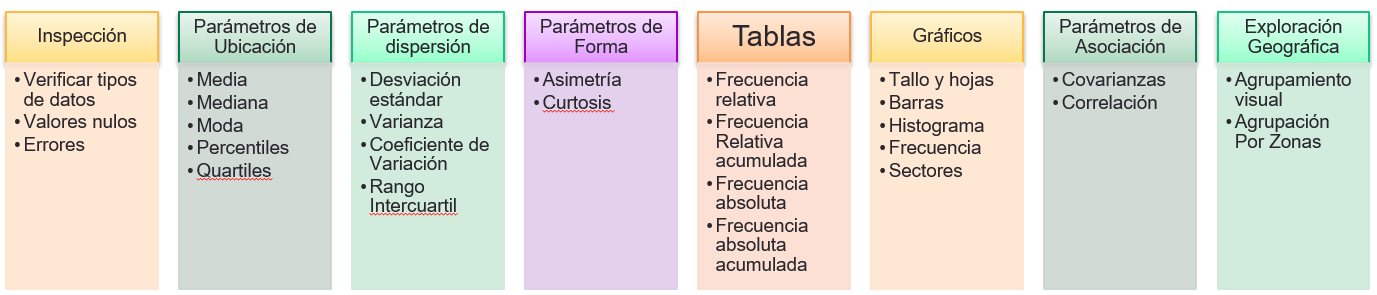

### **2.1 Características del conjunto de datos.**
---

Lo primero a entender son las características del set de datos a revisar, se manera que se pueda tener un mejor entendimiento del ejercicio.

In [ ]:
print(f"El dataframe contienen {df.shape[0]} registros y un total de {df.shape[1]} columnas")

El dataframe contienen 5226 registros y un total de 44 columnas


In [ ]:
file_path = r"/content/Practica_1_Siniestros.xlsx"
file_size = os.path.getsize(file_path) /1024**2

print(f"El tamaño del archivo {file_path} es {file_size:.4f}' MB")

El tamaño del archivo /content/Practica_1_Siniestros.xlsx es 1.8630' MB


In [ ]:
columnas = list(df.columns)
print(f"El Data ser contienen las siguientes {df.shape[1]} Columnas: \n{columnas}")

El Data ser contienen las siguientes 44 Columnas: 
['LLAVE', 'TID', 'TRAMO', 'CORREDOR', 'TYPE', 'LON_TRAMO', 'SIN', 'TPDH', 'P_MOTO', 'P_AUTO', 'P_BUS', 'P_CAMION', 'VEL', 'VELSD', 'LON', 'CURV', 'CURVSD', 'PEND', 'PENDSD', 'CARR', 'RIGID', 'FLEX', 'MIX', 'PVEH', 'PPEAT', 'INT', 'INTSEM', 'AND', 'CICLO', 'PSITP', 'ESTM', 'RTRON', 'RALIM', 'RSITP', 'UCOM', 'URESI', 'LUM', 'AÑO', 'TRONCAL', 'SEC_TRON', 'CARRIL_PRE', 'NOM_CARRIL', 'ALIMENT', 'SEC_ALIMEN']


In [ ]:
df=df.drop(['LLAVE','TID','TYPE','LON','LON_TRAMO','AÑO', 'TRONCAL', 'SEC_TRON', 'CARRIL_PRE', 'NOM_CARRIL','ALIMENT','SEC_ALIMEN'], axis=1)

In [ ]:
# Catida de datos nulos por columna
print(df.isnull().sum())

TRAMO          0
CORREDOR       0
SIN            0
TPDH           0
P_MOTO         0
P_AUTO         0
P_BUS          0
P_CAMION       0
VEL            0
VELSD          0
CURV           0
CURVSD      1146
PEND           0
PENDSD         0
CARR           0
RIGID          0
FLEX           0
MIX            0
PVEH           0
PPEAT          0
INT          384
INTSEM       534
AND            6
CICLO          0
PSITP        588
ESTM           0
RTRON       3420
RALIM       4386
RSITP        192
UCOM          24
URESI         24
LUM           18
dtype: int64


### **2.2 Tipos y Ajustes de Variables.**
---

Como se vio en sesiones anteriores, luego de entender el conjunto de datos, es importante entender y definir el tipo de variables, así como sus características generales, de manera que sea posible hacer un tratamiento de datos mas adecuado.

In [ ]:
df = df.fillna(0)

In [ ]:
columnas_binarias = ['PVEH', 'PPEAT','CICLO','ESTM','RIGID','FLEX','MIX']  # columnas que contienen solo 0 y 1

df[columnas_binarias] = df[columnas_binarias].astype(bool)
columnas_binarias

['PVEH', 'PPEAT', 'CICLO', 'ESTM', 'RIGID', 'FLEX', 'MIX']

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['SIN', 'TPDH', 'P_MOTO', 'P_AUTO', 'P_BUS', 'P_CAMION', 'VEL', 'VELSD',
       'CURV', 'CURVSD', 'PEND', 'PENDSD', 'CARR', 'INT', 'INTSEM', 'AND',
       'PSITP', 'RTRON', 'RALIM', 'RSITP', 'UCOM', 'URESI', 'LUM'],
      dtype='object')

In [ ]:
# Identify object columns
object_cols = df.select_dtypes(include='object').columns
object_cols

Index(['TRAMO', 'CORREDOR'], dtype='object')

### **2.3 Estadistica Descriptiva**

---
Realizar un AED es esencial. Permite visualizar la distribución de datos, identificar valores atípicos y comprender las relaciones entre variables. Este paso puede guiarle en la elección del algoritmo de agrupamiento y el número de conglomerados adecuados.

In [ ]:
d = (df[numeric_cols].describe().round(2)).iloc[:,0:]
f =df[numeric_cols].reindex(d.columns, axis = 1).agg(func=stats_list).round(3)
frames = [d,f]
result = pd.concat(frames).applymap('{:.2f}'.format)

In [ ]:
result

,SIN,TPDH,P_MOTO,P_AUTO,P_BUS,P_CAMION,VEL,VELSD,CURV,CURVSD,...,INT,INTSEM,AND,PSITP,RTRON,RALIM,RSITP,UCOM,URESI,LUM
count,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,...,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00,5226.00
mean,4.39,609.56,0.16,0.53,0.26,0.05,30.44,10.38,5.13,4.01,...,3.66,2.85,3.92,2.62,5.68,0.53,17.07,11.92,24.28,44.16
std,4.03,332.10,0.11,0.20,0.20,0.04,9.84,3.77,6.02,6.01,...,2.68,2.31,2.35,2.11,10.11,1.68,11.94,16.23,19.72,24.14
min,0.00,9.00,0.00,0.00,0.00,0.00,3.96,1.08,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,370.00,0.08,0.39,0.11,0.02,23.38,7.91,1.10,0.24,...,1.87,1.16,2.37,0.97,0.00,0.00,8.00,2.59,8.77,29.42
50%,3.00,555.00,0.14,0.54,0.22,0.03,29.12,10.24,3.31,2.34,...,3.14,2.44,3.40,2.25,0.00,0.00,15.00,6.75,20.08,38.64
75%,6.00,776.00,0.22,0.67,0.37,0.07,36.44,12.82,6.86,5.43,...,4.86,3.85,4.73,3.66,8.00,0.00,25.00,15.19,36.67,53.45
max,30.00,2195.00,0.67,0.97,0.99,0.28,66.21,24.26,51.63,65.73,...,21.82,11.79,20.17,11.32,63.00,12.00,69.00,191.01,145.18,233.56
range_f,30.00,2186.00,0.66,0.97,0.99,0.28,62.25,23.18,51.63,65.73,...,21.82,11.79,20.16,11.32,63.00,12.00,69.00,191.01,145.18,233.56
median,3.00,555.00,0.14,0.54,0.22,0.03,29.12,10.24,3.31,2.34,...,3.14,2.44,3.40,2.25,0.00,0.00,15.00,6.75,20.08,38.64


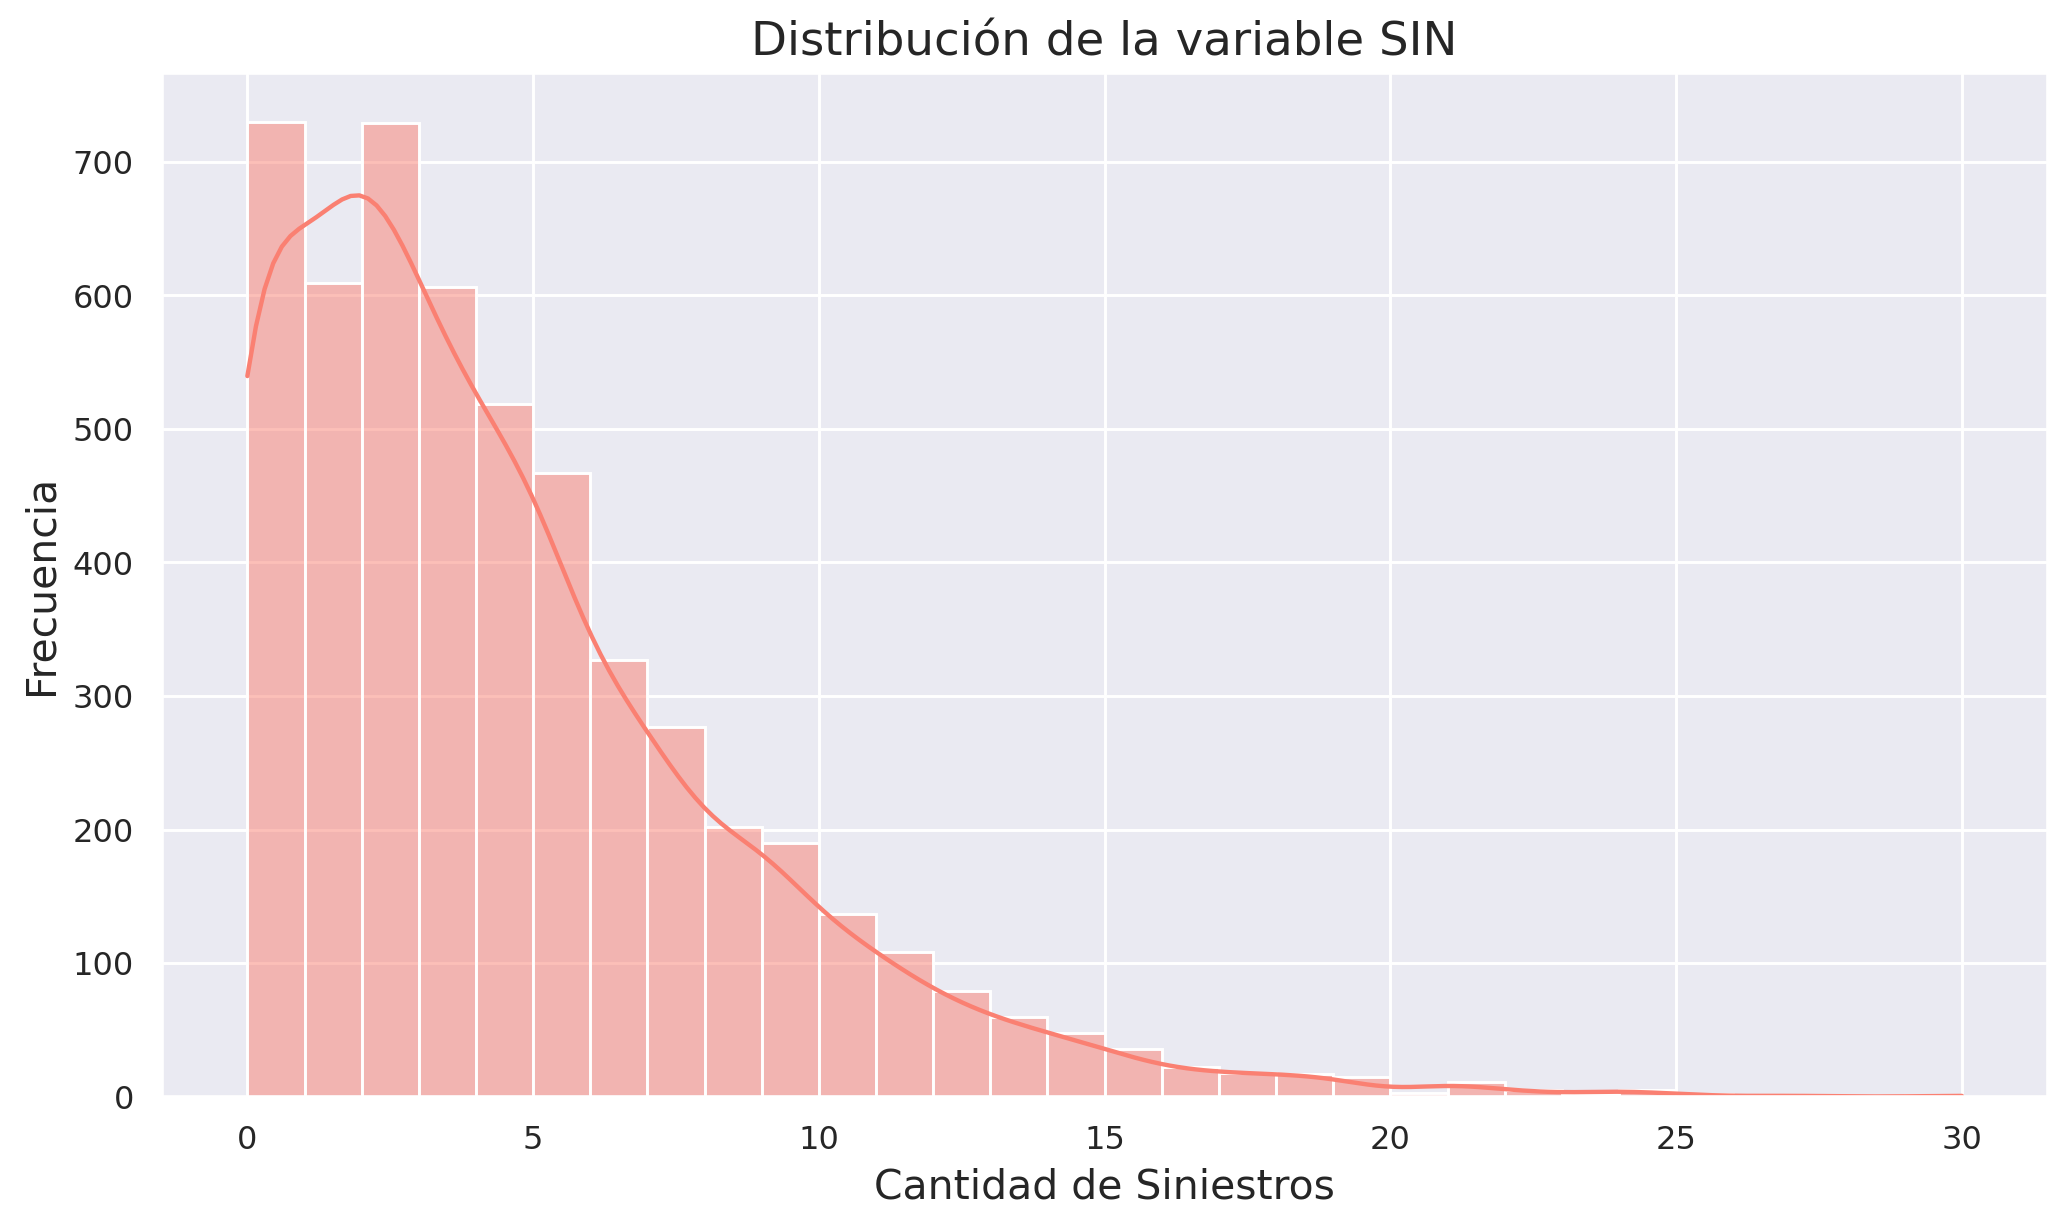

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="SIN", bins=30, kde=True, color='salmon')

plt.title("Distribución de la variable SIN", fontsize=16)
plt.xlabel("Cantidad de Siniestros", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
corr = df[numeric_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,SIN,TPDH,P_MOTO,P_AUTO,P_BUS,P_CAMION,VEL,VELSD,CURV,CURVSD,PEND,PENDSD,CARR,INT,INTSEM,AND,PSITP,RTRON,RALIM,RSITP,UCOM,URESI,LUM
SIN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TPDH,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
P_MOTO,0.17,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
P_AUTO,-0.36,0.17,-0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
P_BUS,0.24,-0.23,-0.35,-0.80,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
P_CAMION,0.09,0.01,0.30,-0.18,-0.20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
VEL,-0.12,0.21,0.06,0.20,-0.26,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
VELSD,-0.06,0.25,-0.01,0.18,-0.19,0.09,0.61,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CURV,-0.07,-0.05,0.02,0.05,-0.05,-0.03,-0.10,-0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CURVSD,-0.04,-0.04,0.06,-0.00,-0.02,-0.03,-0.12,-0.13,0.69,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
# --- Correlación con la variable respuesta 'SIN' ---
correlaciones = df.corr(numeric_only=True)['SIN'].sort_values(ascending=False)


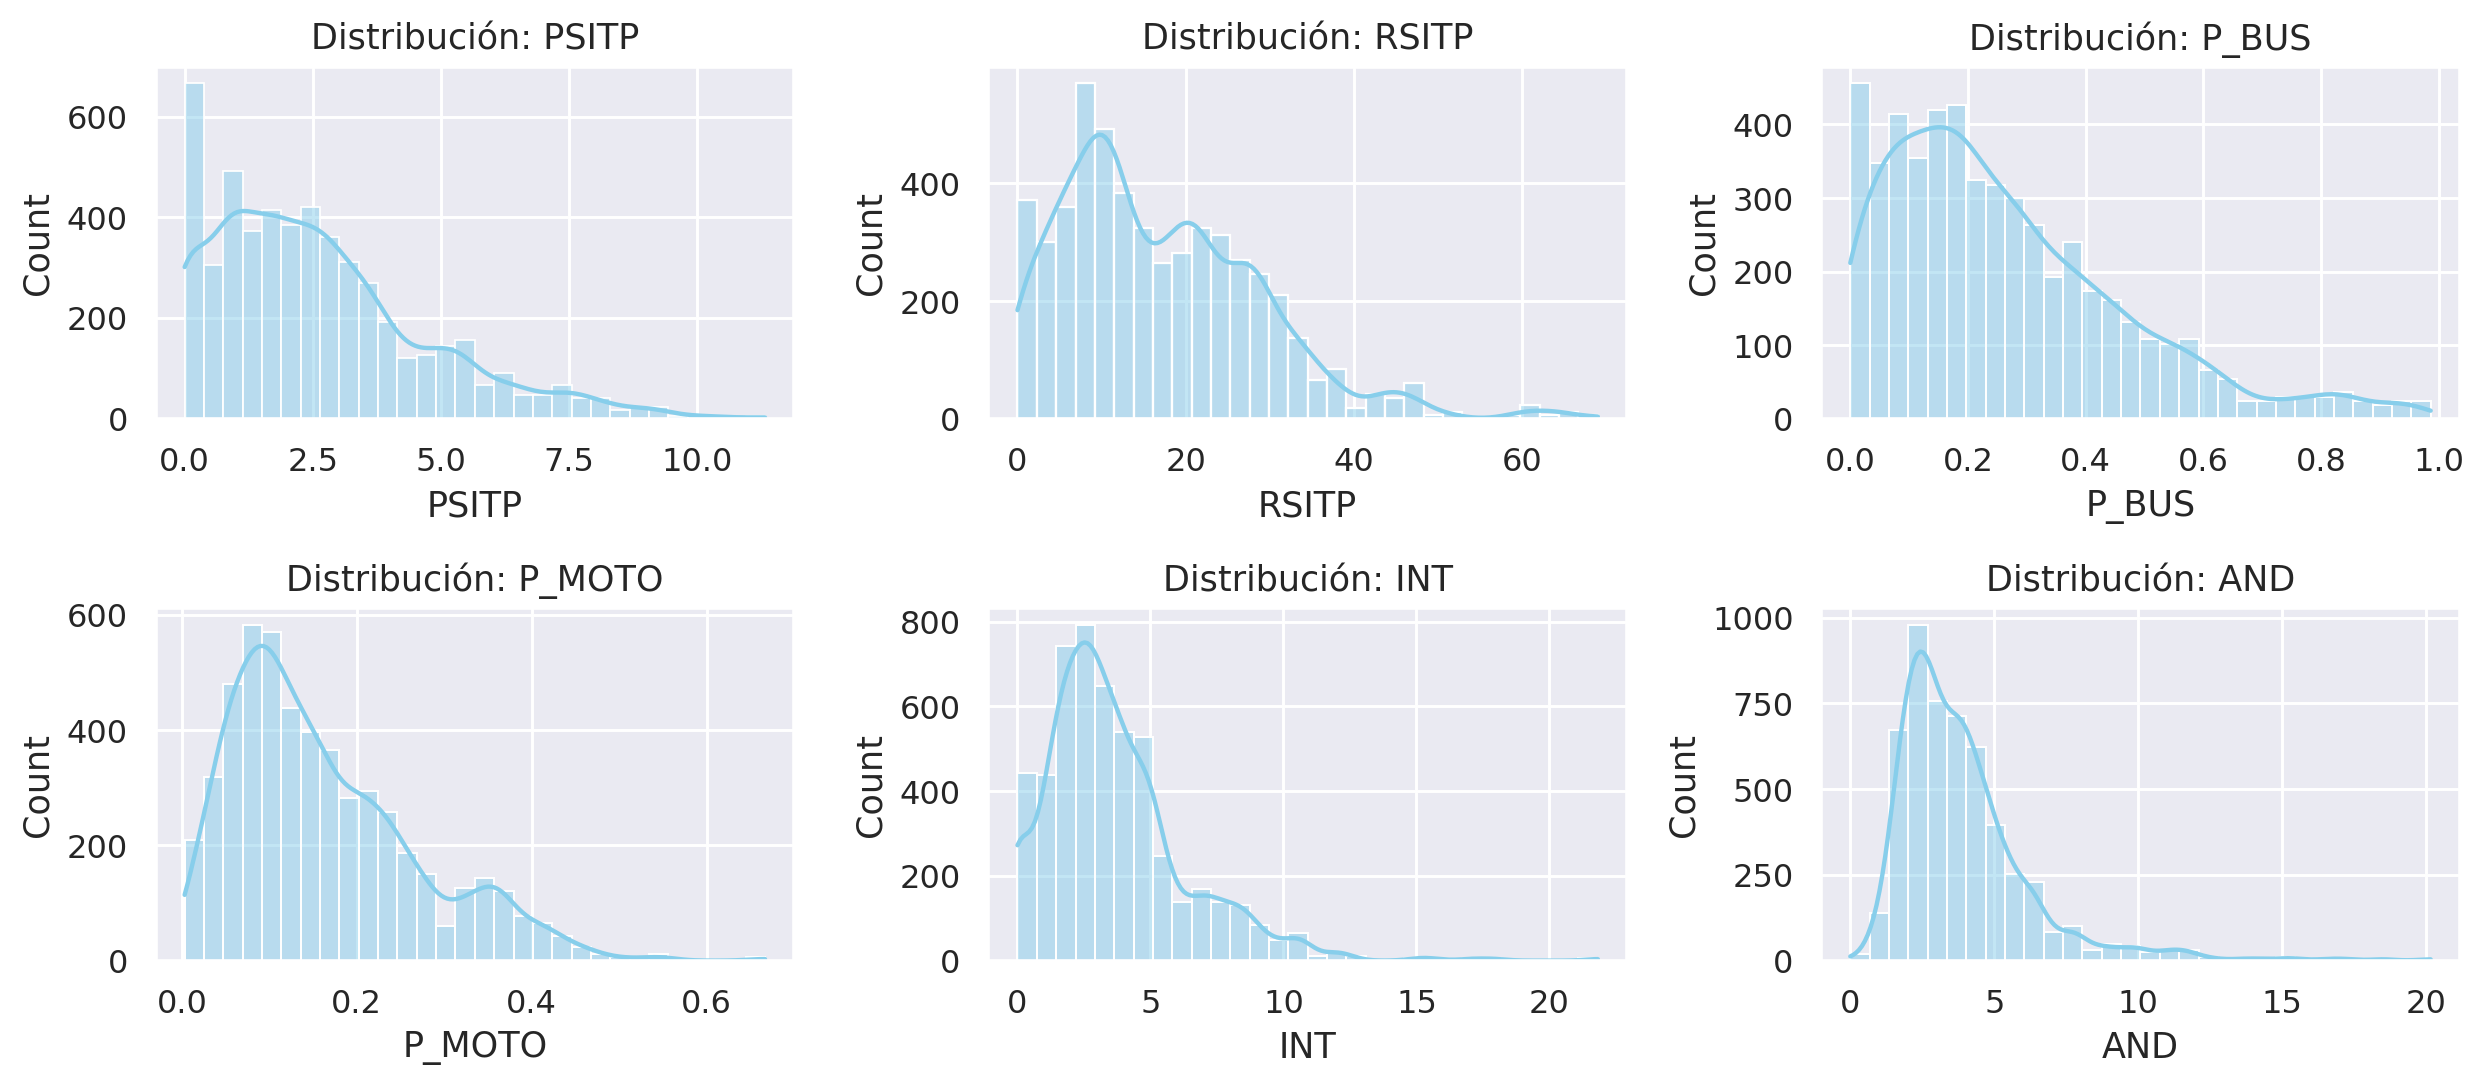

In [ ]:
top_vars = correlaciones.index[1:7]  # Excluye 'SIN' que está en la posición 0

plt.figure(figsize=(12, 10))
for i, var in enumerate(top_vars, 1):
    plt.subplot(4, 3, i)
    if df[var].nunique() < 20:
        sns.countplot(data=df, x=var, palette='Set2')
        plt.xticks(rotation=45)
    else:
        sns.histplot(df[var].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución: {var}')
    plt.tight_layout()
plt.show()

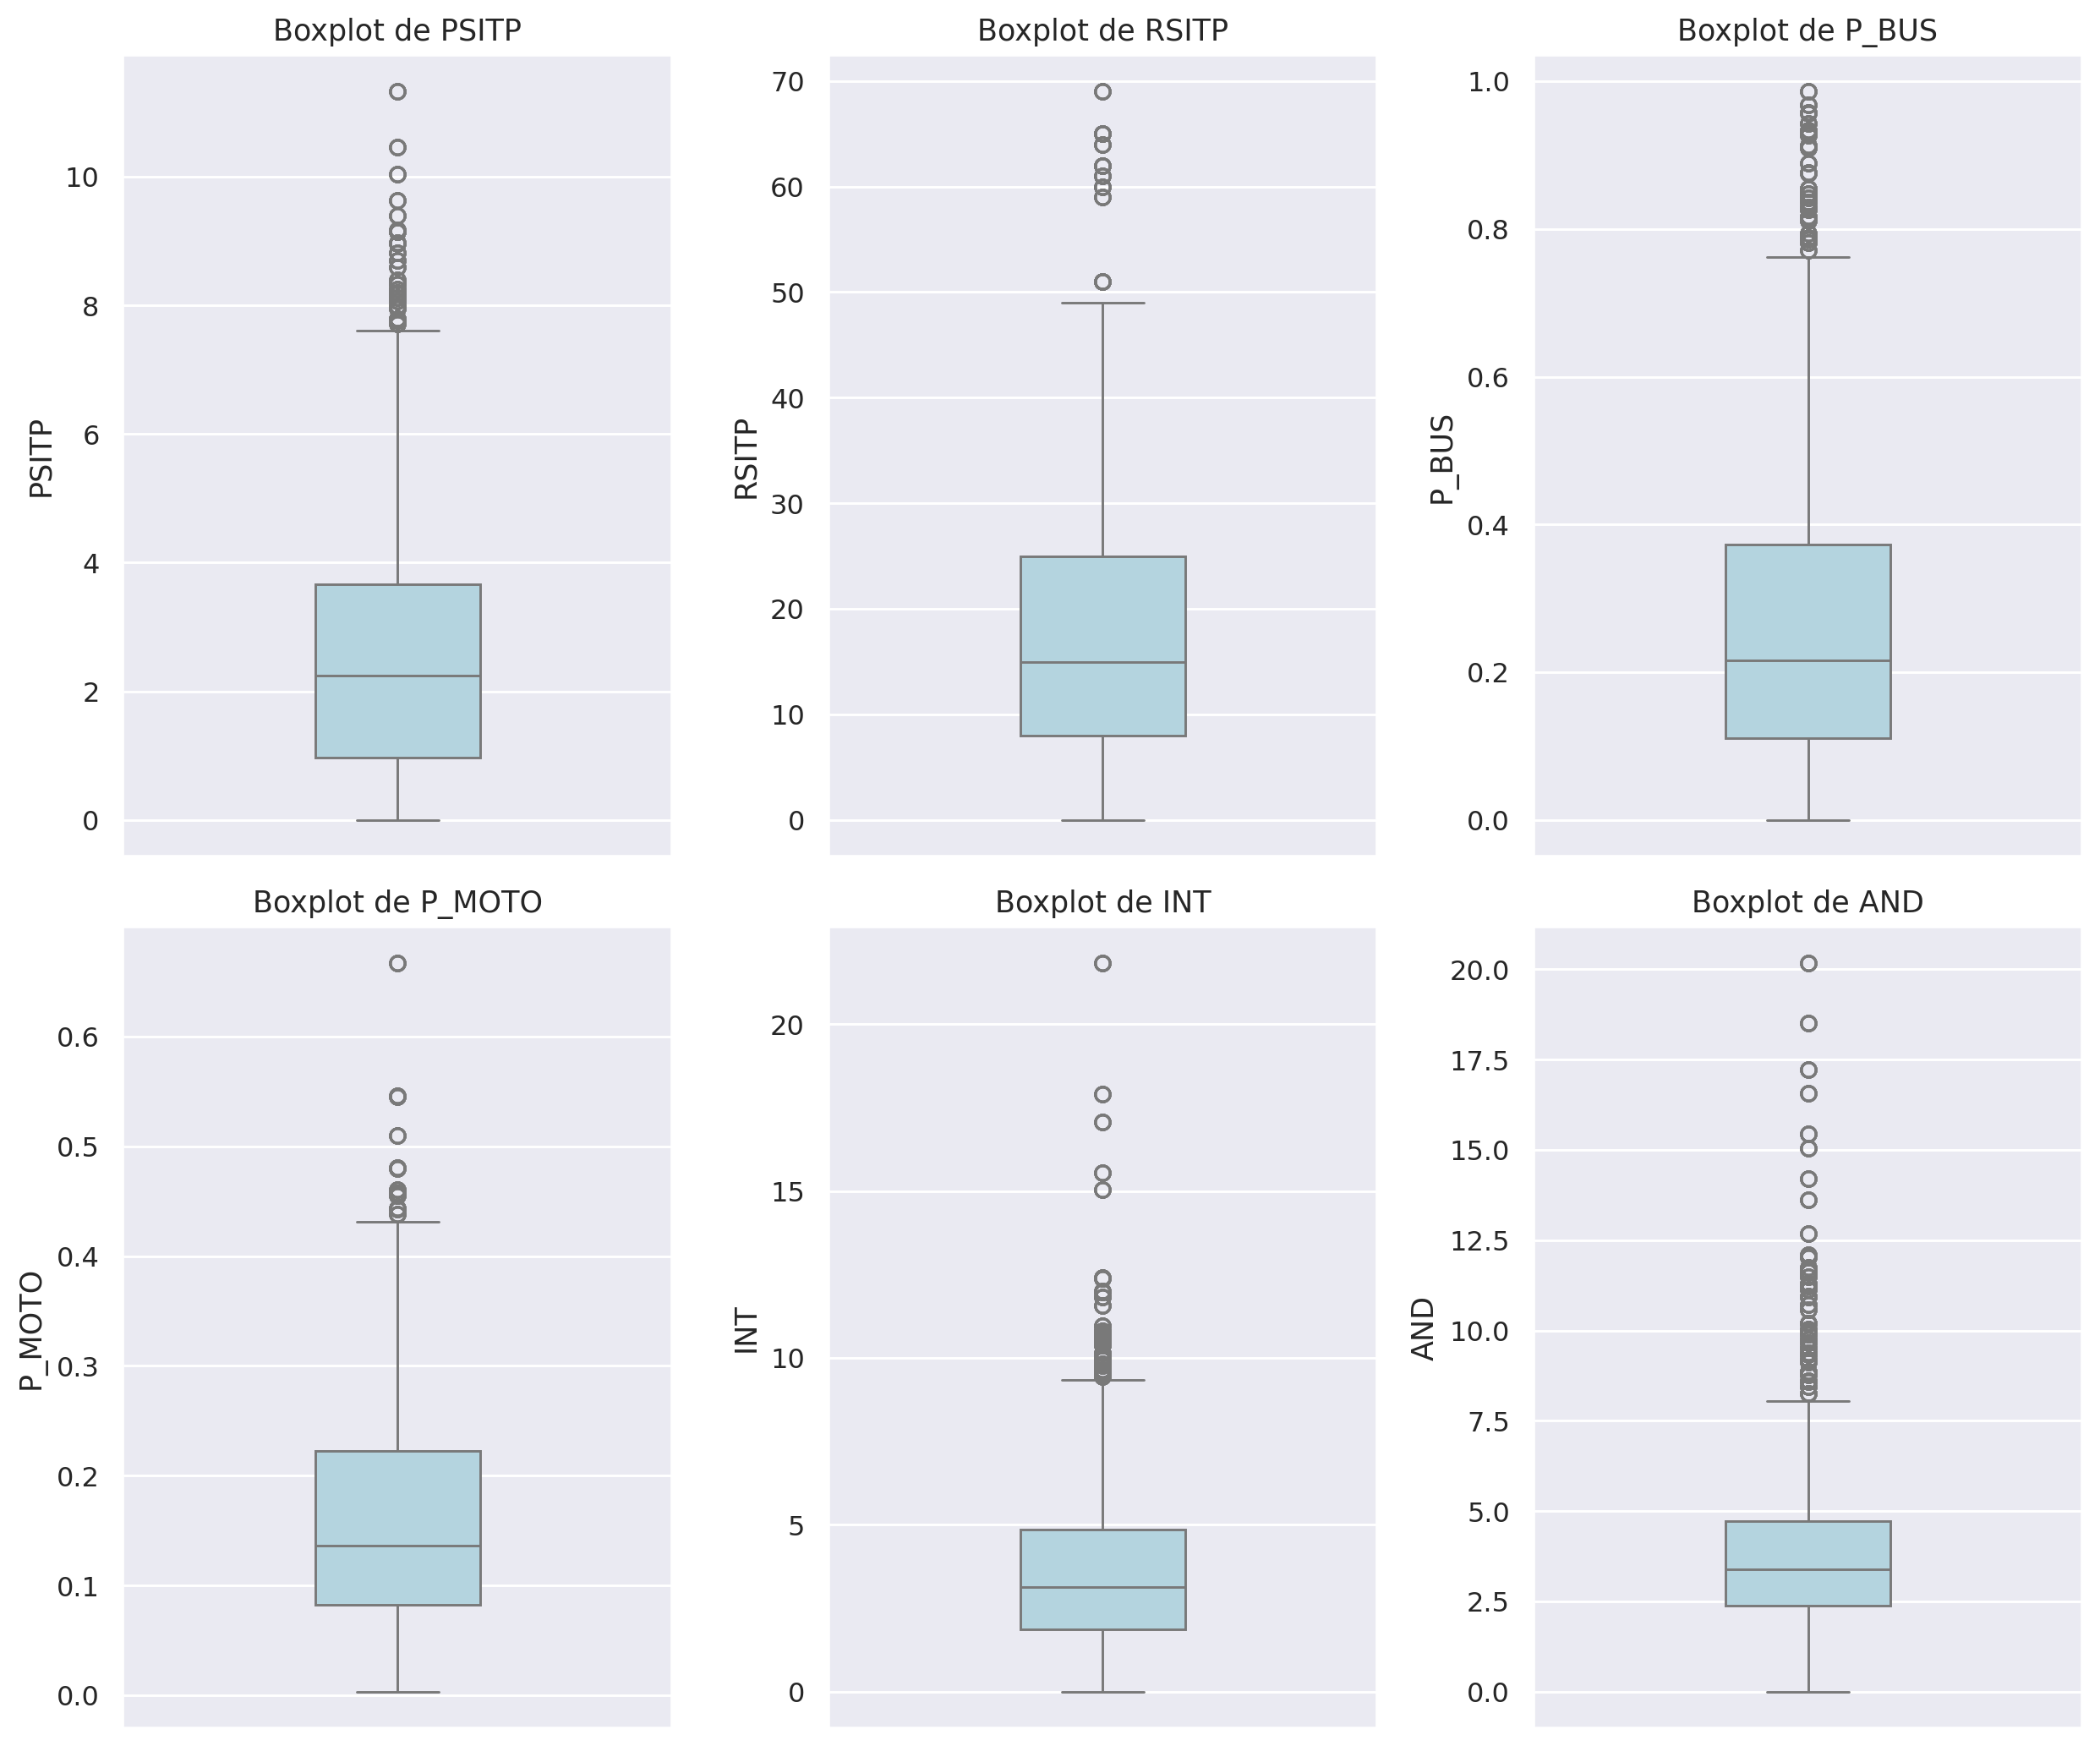

In [ ]:
top_vars = correlaciones.index[1:7]

plt.figure(figsize=(12, 10))
for i, var in enumerate(top_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=var, color='lightblue', width=0.3)
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

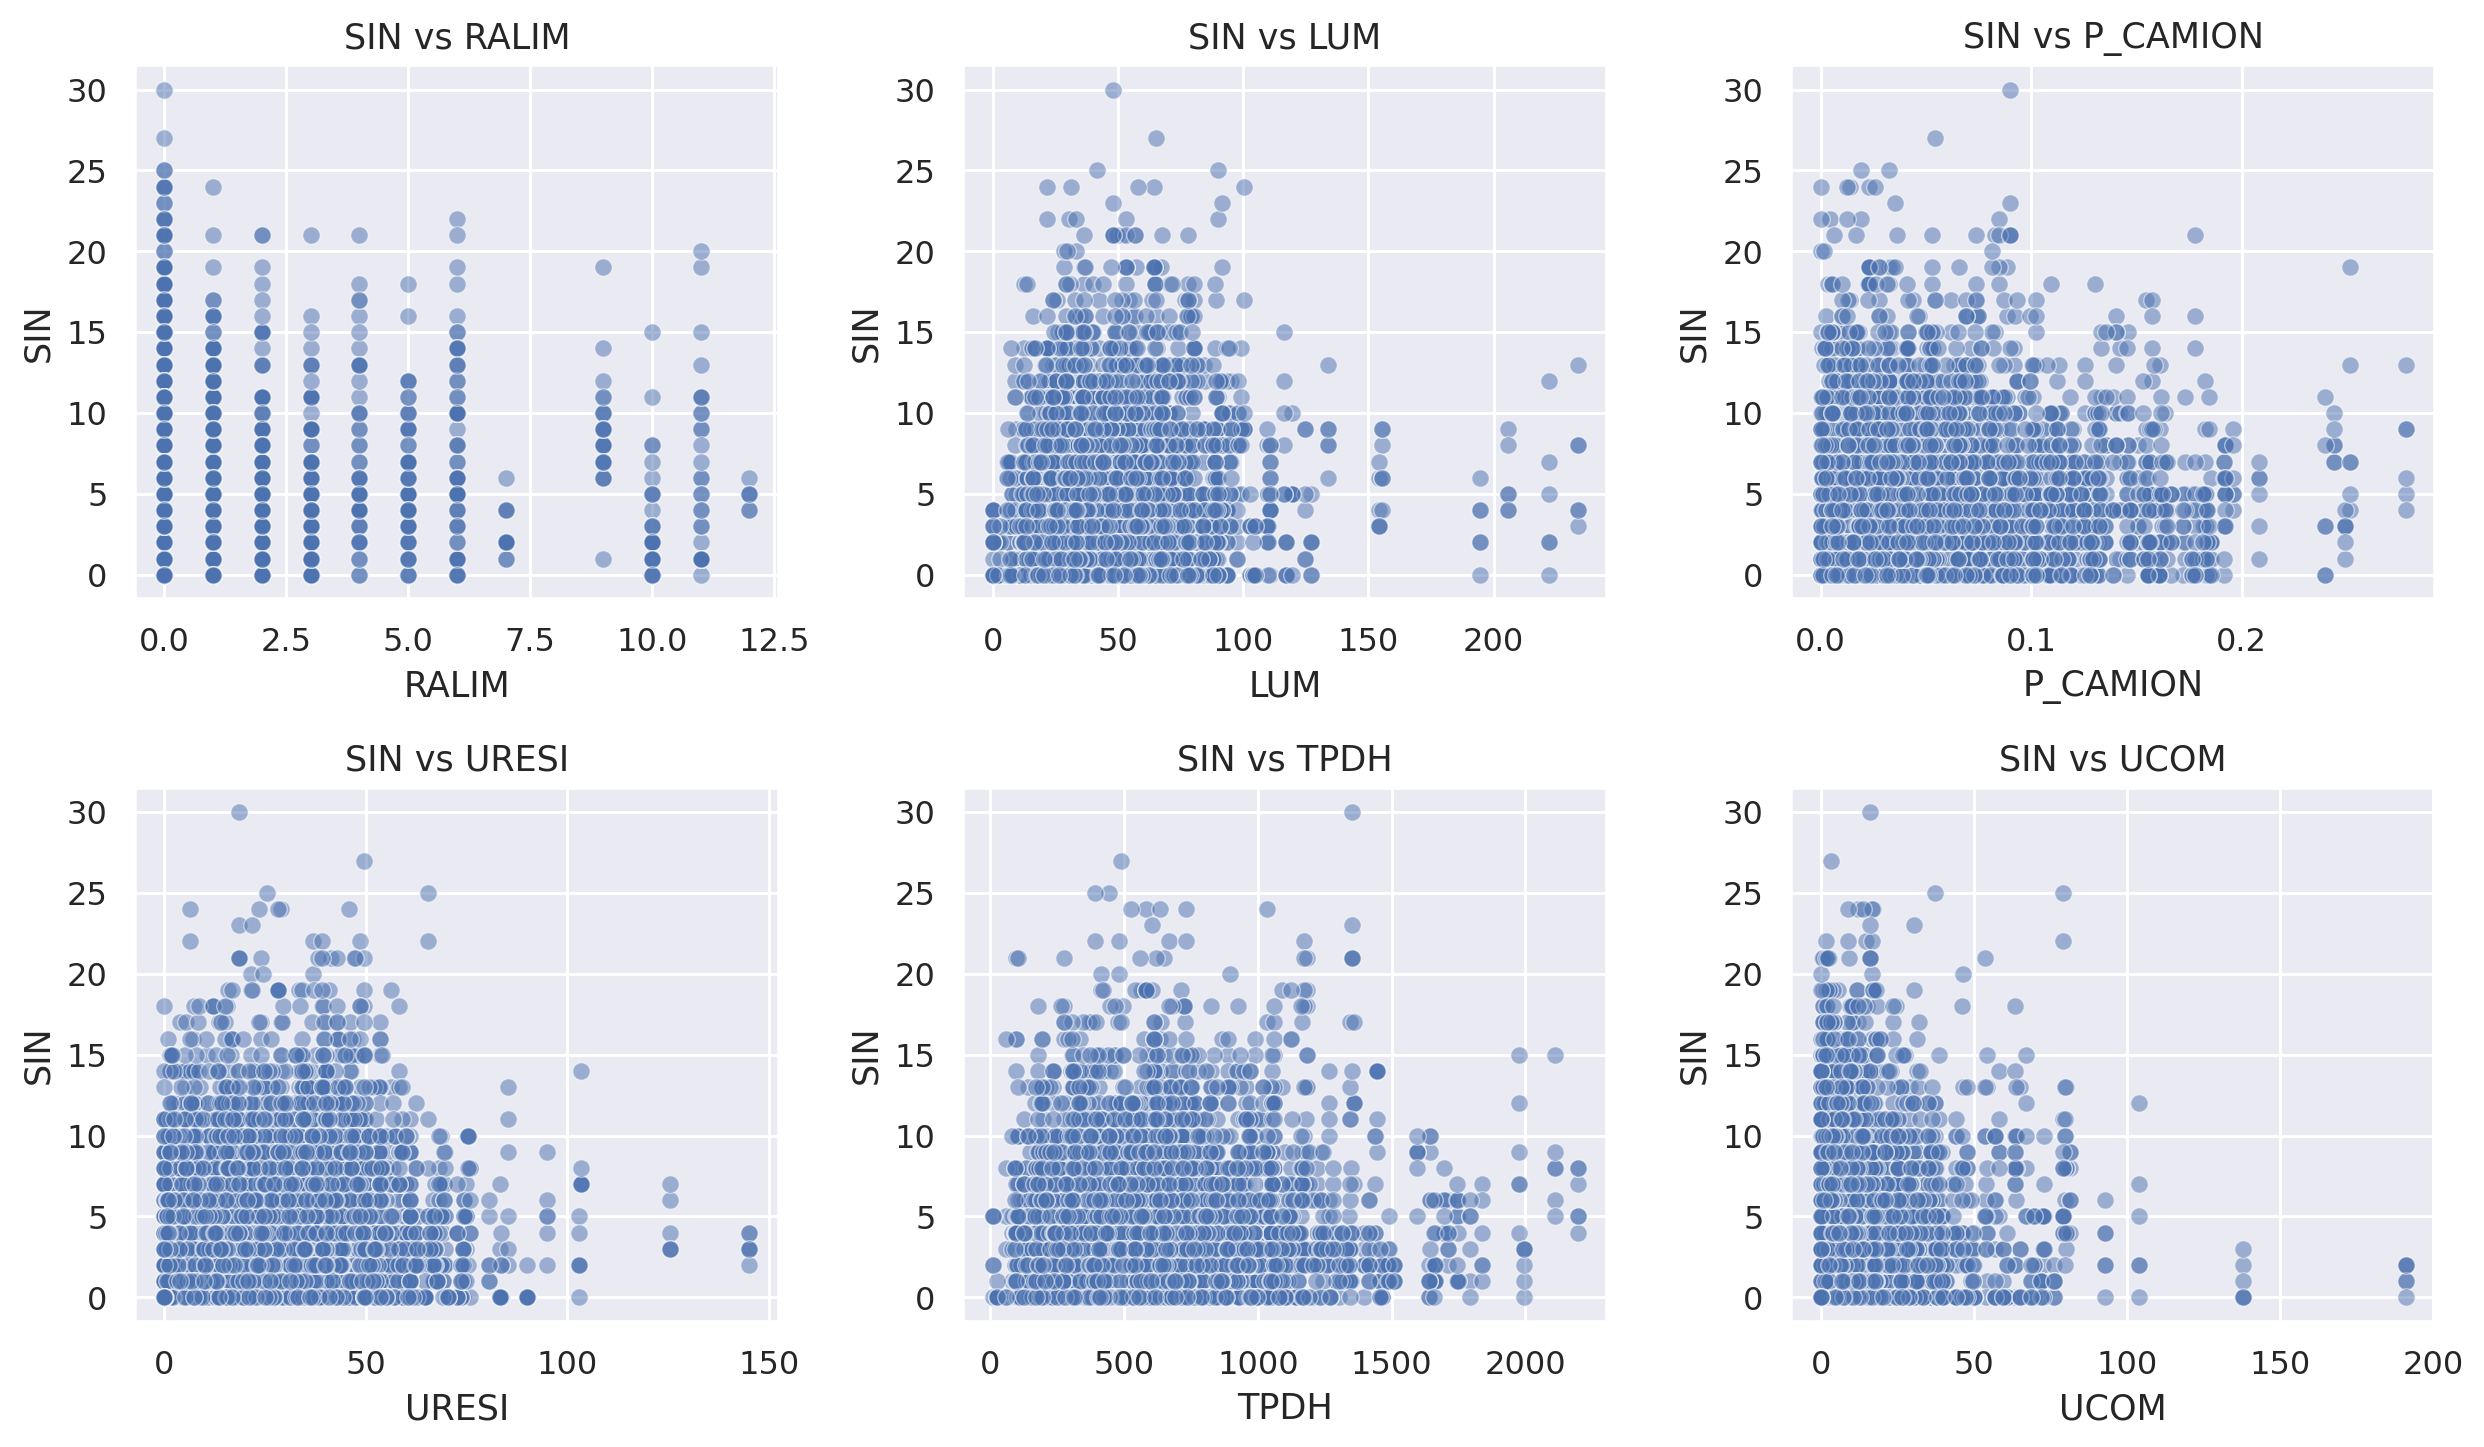

In [ ]:
# --- Análisis bivariado: Scatterplots (variables continuas) ---
top_vars = correlaciones.index[8:15]
cont_vars = [var for var in top_vars if df[var].nunique() >= 10]

plt.figure(figsize=(12,10))
for i, var in enumerate(cont_vars, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=var, y='SIN', alpha=0.5)
    plt.title(f'SIN vs {var}')
    plt.tight_layout()
plt.show()

Vamos a quitar varioables 1que nuestra exploracion inical nos puede indicar porblemas de colinealidad

In [ ]:
df1 = df.drop(['P_AUTO','CURVSD','CARR'], axis = 1)

##**3 PREPROCESAMIENTO Y COMPONENTES PRINCIPALES**

--------

El preprocesamiento de datos es esencial para asegurar la calidad del análisis, ya que permite limpiar, estructurar y escalar adecuadamente la información. Al aplicar técnicas como PCA, se puede reducir la dimensionalidad del conjunto de datos y destacar las variables que más contribuyen a la varianza. Esto es especialmente útil para comprender mejor los factores asociados a los siniestros (SIN) y orientar decisiones basadas en evidencia.


### **3.1 Preprocesamiento**

--------------
El preprocesamiento de las variables es una etapa fundamental en cualquier análisis de datos, ya que garantiza que la información esté limpia, estructurada y sea adecuada para aplicar modelos estadísticos o de machine learning. Este proceso incluye la eliminación de variables irrelevantes, el tratamiento de valores faltantes, la transformación de variables categóricas, y la normalización o estandarización de datos, lo cual es especialmente importante en técnicas sensibles a la escala como el Análisis de Componentes Principales (PCA) y modelación

Previo a la aplicación de diferentes técnicas estadísticas es importante realizar el preprocesamiento de las bases de datos, esto con la finalidad de obtener el conjunto de trabajo adecuado, en esta fase se pueden incluir procesos como:

*   Escalado
*   Codificación
*   Cambios en la dimensional dad o creación de arreglos

In [ ]:
## Set de datos para agrupación

X_ag = df1.drop(['TRAMO','CORREDOR','SIN'], axis = 1)  # Se quitan variables que pueden sesgar el análisis como el tipo de siniestros y los números y tasas de siniestros.
columna_ag = list(X_ag.columns)
y_ag = df1[['SIN']]
# Dimensiones del conjunto de Calsificacion
print(f'Dimensiones del conjunto de clasificacion: {X_ag.shape}')
print(f'Dimensiones del conjunto de clasificacion: {y_ag.shape}')

Dimensiones del conjunto de clasificacion: (5226, 26)
Dimensiones del conjunto de clasificacion: (5226, 1)


In [ ]:
bol = ['PVEH', 'PPEAT','CICLO','ESTM','RIGID','FLEX','MIX']          # identifican las variables booleanas (estas no requieren escalarse)

numerc = X_ag.select_dtypes(include=np.number).columns      # Se identifican las variables numericas (sin tener en ceunta las variables booleanas), als demas deben ser escaladas.
num = remove_multiple_elements(numerc, bol)

cat = X_ag.select_dtypes(include='object').columns.tolist() ## Se identifican las variables cualitativas estas seran codificadas con onehotencoding


X_bol = X_ag[bol].values
X_num = X_ag[num].values

print (f'Dimensiones variables boleanas: {X_bol.shape}')
print(f'Dimensiones variables numericas: {X_num.shape}')

Dimensiones variables boleanas: (5226, 7)
Dimensiones variables numericas: (5226, 19)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_minmax = scaler.fit_transform(X_num)

In [ ]:
# enc = OneHotEncoder(sparse_output=False)     # Declaramos el Transformer "OneHotEncoder".
# X_cat_onehot = enc.fit_transform(X_cat) # Usamos "fit_transform" para obtener la matriz transformada.

In [ ]:
X_ag_fin = np.concatenate((X_num_minmax, X_bol),axis=1)
print(X_ag_fin.shape)

(5226, 26)


### **3.2 Análisis de componentes principales (PCA) para agrupación.**

------

La aplicación de PCA permite reducir la dimensionalidad del conjunto de datos, identificando combinaciones lineales de variables originales que explican la mayor parte de la varianza. En el contexto del análisis de la variable de interés SIN (siniestros), el PCA facilita la identificación de aquellas variables que más contribuyen a la variabilidad general del sistema, lo que resulta clave para entender los factores subyacentes que podrían estar relacionados con la ocurrencia de siniestros y para orientar de manera más eficiente los análisis posteriores o la toma de decisiones.

In [ ]:

principal=PCA(n_components=26)
principal.fit(X_ag_fin)
x=principal.transform(X_ag_fin)

# Check the dimensions of data after PCA
print(x.shape)

(5226, 26)


In [ ]:
varianza_expl = principal.explained_variance_ratio_
print(varianza_expl)

[3.11566991e-01 1.72107759e-01 1.21678194e-01 9.94243179e-02
 5.11774860e-02 3.27466616e-02 3.14209846e-02 2.81394601e-02
 2.28061315e-02 1.71846338e-02 1.52834121e-02 1.31064035e-02
 1.23883556e-02 1.16051436e-02 1.09980808e-02 1.01534778e-02
 9.28237415e-03 8.20779945e-03 6.49182296e-03 5.66077646e-03
 4.90253933e-03 3.66719558e-03 1.81534390e-18 1.67085607e-35
 0.00000000e+00 0.00000000e+00]


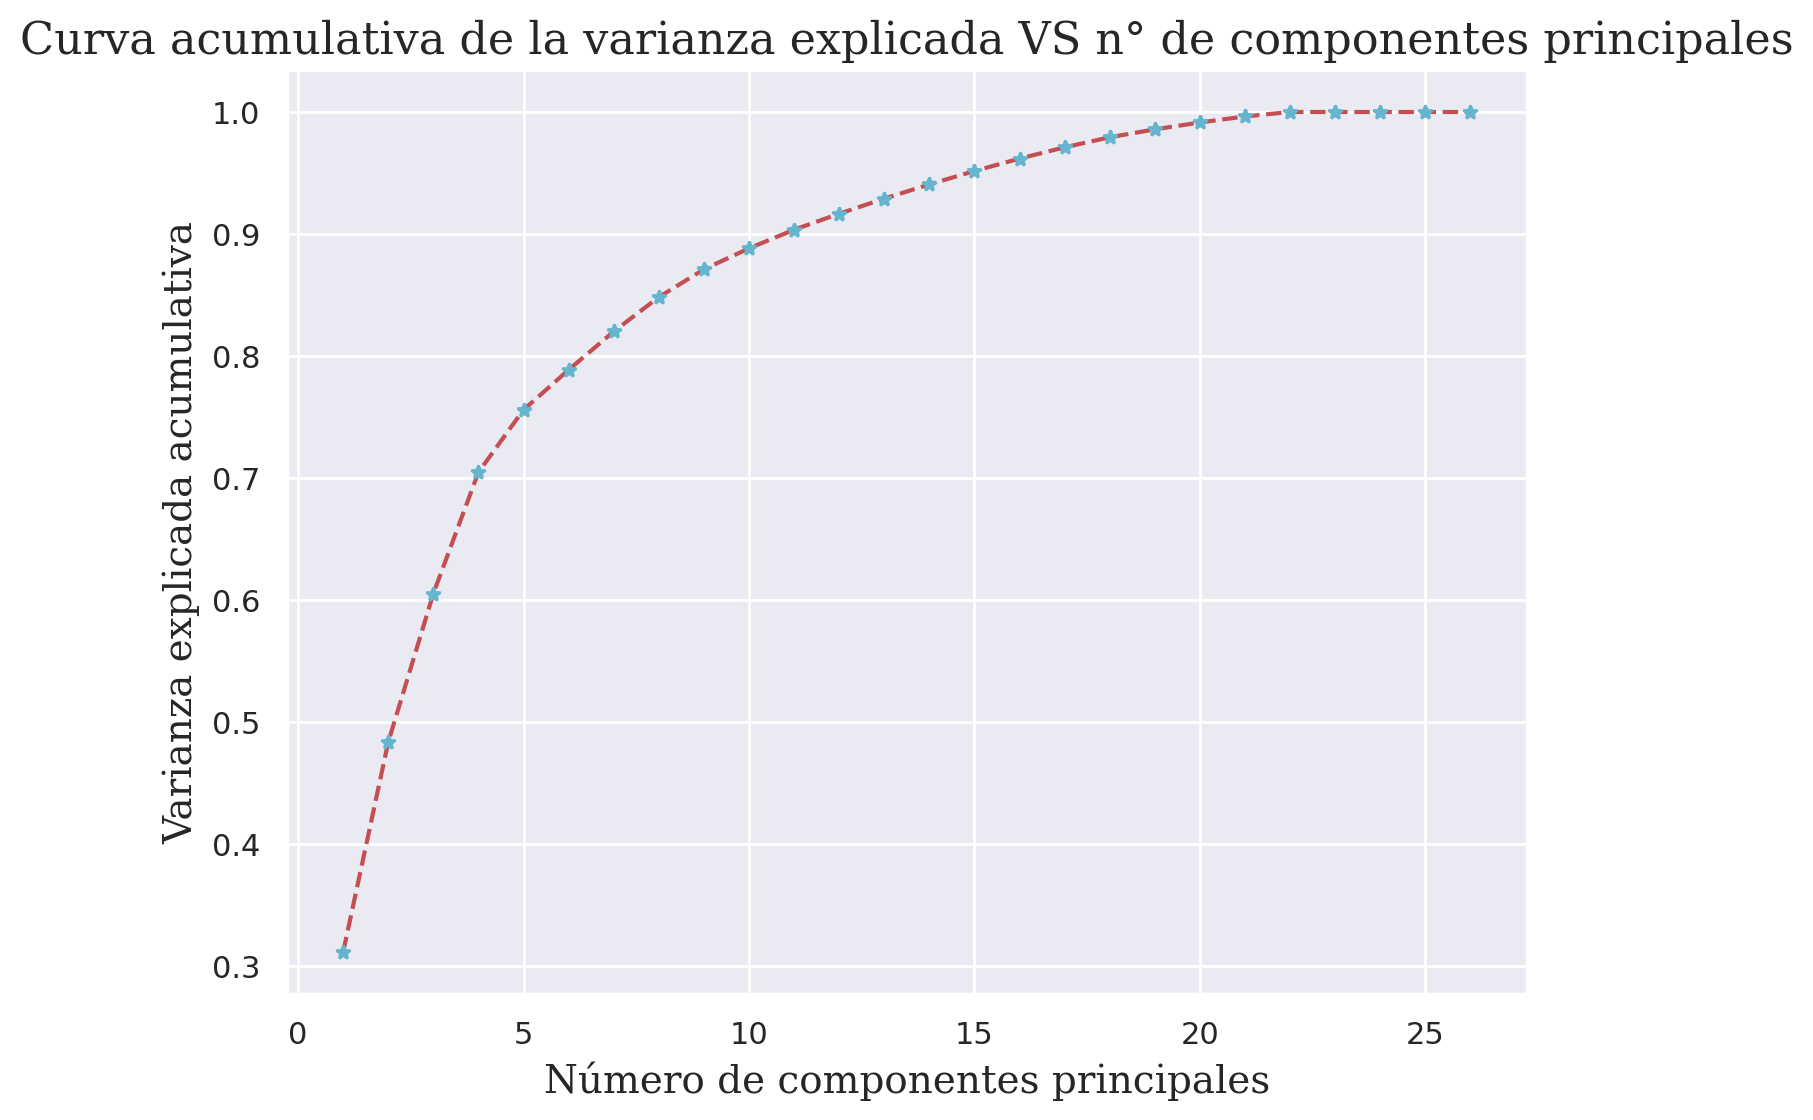

In [ ]:
cumulative_explained_variance_plot(varianza_expl)

In [ ]:

# Crear DataFrame con la varianza explicada
df_varianza = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(varianza_expl))],
    'Varianza Explicada (%)': varianza_expl * 100
})
# Mostrar ordenado
df_varianza = df_varianza.sort_values(by='Varianza Explicada (%)', ascending=False).reset_index(drop=True)

In [ ]:
# Obtener los nombres de las variables originales si están disponibles
nombres_variables =columna_ag

# Matriz de cargas
loadings = pd.DataFrame(principal.components_.T,
                        columns=[f'PC{i+1}' for i in range(principal.n_components_)],
                        index=nombres_variables)

# Ver las variables que más aportan a cada componente
# Ejemplo: top 5 variables para PC1
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(15)
print("Top 5 variables que más aportan a PC1:")
print(top_pc1)

Top 5 variables que más aportan a PC1:
RTRON       0.600408
RSITP       0.499549
RALIM       0.449398
ESTM        0.217760
FLEX        0.196781
PPEAT       0.148189
VEL         0.144796
PVEH        0.138895
CICLO       0.093703
VELSD       0.091639
P_BUS       0.086722
MIX         0.057182
P_CAMION    0.050451
RIGID       0.045034
P_MOTO      0.041306
Name: PC1, dtype: float64


##**4 MODELACION DE DATOS**

--------

La modelación y la implementación de funciones de desempeño en seguridad vial son fundamentales para comprender los factores que influyen en la siniestralidad. Estas herramientas permiten predecir riesgos, identificar puntos críticos y orientar intervenciones más efectivas para reducir accidentes y salvar vidas..

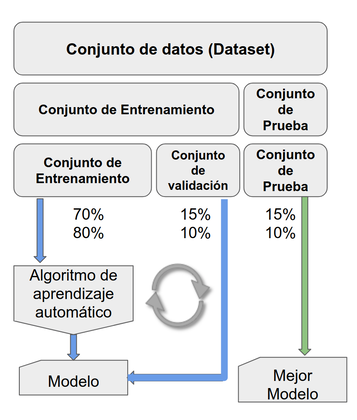


In [ ]:
y = y_ag.iloc[:, 0]  # extrae la única columna como vecto
X = pd.DataFrame(X_ag_fin, columns=[f'var_{i}' for i in range(X_ag_fin.shape[1])])
X.columns = columna_ag

### **4.1 Conjuntos de entrenamiento y pruebas**

---
Generar conjuntos de entrenamiento y prueba, junto con la aplicación de validación cruzada, es crucial para garantizar que un modelo de análisis o predicción sea robusto y generalizable. El conjunto de entrenamiento permite ajustar los parámetros del modelo, mientras que el de prueba evalúa su rendimiento en datos no vistos. La validación cruzada, por su parte, ayuda a reducir la varianza de las estimaciones, evita el sobreajuste y permite una selección más confiable de variables y modelos óptimos. Esto es especialmente importante en contextos como la seguridad vial, donde se requiere alta precisión para la toma de decisiones.

In [ ]:
# 1. División 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)


### **4.1 Validacion Cruzada**

---
La validación cruzada es una técnica fundamental en el desarrollo de modelos estadísticos y de machine learning, que permite evaluar su desempeño de manera robusta y evitar problemas como el sobreajuste. Consiste en dividir el conjunto de datos en varios bloques o folds. En cada iteración, uno de estos bloques se utiliza como conjunto de prueba, mientras los restantes se emplean para entrenar el modelo. Este proceso se repite tantas veces como bloques se hayan definido (En este caso 5 en una validación cruzada de 5-fold), y al final se promedian los resultados obtenidos. Esto proporciona una estimación más realista del rendimiento del modelo al generalizar a datos nuevos.

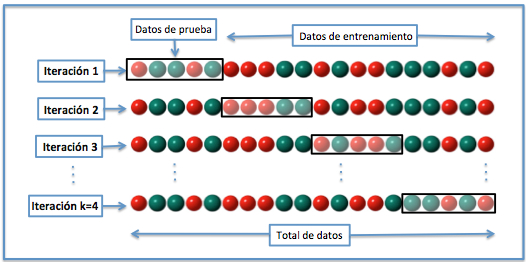

In [ ]:
# 4. Aplicar KFold sobre conjunto de entrenamiento
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mejores_resultados = []

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mejores_resultados = []
print("🔁 Validación cruzada 5-fold con stepwise...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    selected_vars = stepwise_selection(X_tr, y_tr, verbose=False)
    model = fit_model(X_tr[selected_vars], y_tr)

    # Evaluación en validación
    X_val_model = sm.add_constant(X_val[selected_vars], has_constant='add')
    y_pred_val = model.predict(X_val_model)

    pseudo_r2 = 1 - model.llf / model.null_deviance
    mejores_resultados.append({
        'fold': fold+1,
        'variables': selected_vars,
        'modelo': model,
        'aic': model.aic,
        'bic': model.bic,
        'pseudo_r2': pseudo_r2
    })
    print(f"Fold {fold+1}: AIC={model.aic:.2f}, Pseudo-R²={pseudo_r2:.4f}, Variables={len(selected_vars)}")

🔁 Validación cruzada 5-fold con stepwise...
Fold 1: AIC=14655.67, Pseudo-R²=3.8500, Variables=13
Fold 2: AIC=14668.16, Pseudo-R²=3.8542, Variables=13
Fold 3: AIC=14621.12, Pseudo-R²=3.8909, Variables=12
Fold 4: AIC=14648.79, Pseudo-R²=3.9146, Variables=11
Fold 5: AIC=14697.43, Pseudo-R²=3.9051, Variables=10


In [ ]:
mejor_modelo_info = min(mejores_resultados, key=lambda x: x['aic'])
modelo_final = mejor_modelo_info['modelo']
vars_finales = mejor_modelo_info['variables']

print(f"\n✅ Mejor modelo: fold {mejor_modelo_info['fold']} con AIC={mejor_modelo_info['aic']:.2f}")


✅ Mejor modelo: fold 3 con AIC=14621.12


### **4.3 Aplicacion de Modelo Binomial Negativo**

---
El modelo binomial negativo es especialmente importante en la estimación de funciones de desempeño en seguridad vial porque permite manejar adecuadamente uno de los problemas más comunes en este tipo de datos: la sobredispersión.

En contextos como el análisis de siniestralidad, la variable de interés (por ejemplo, el número de siniestros en un tramo vial) suele ser una variable de conteo. Aunque modelos como la regresión de Poisson son una primera aproximación natural para este tipo de variables, suponen que la media y la varianza son iguales, lo cual rara vez ocurre en la práctica.

En cambio, el modelo binomial negativo relaja esta restricción al incorporar un parámetro adicional que permite que la varianza sea mayor que la media. Esto lo hace más flexible y adecuado para modelar la variabilidad real observada en los datos de siniestralidad, mejorando la calidad de las predicciones y evitando errores sistemáticos.

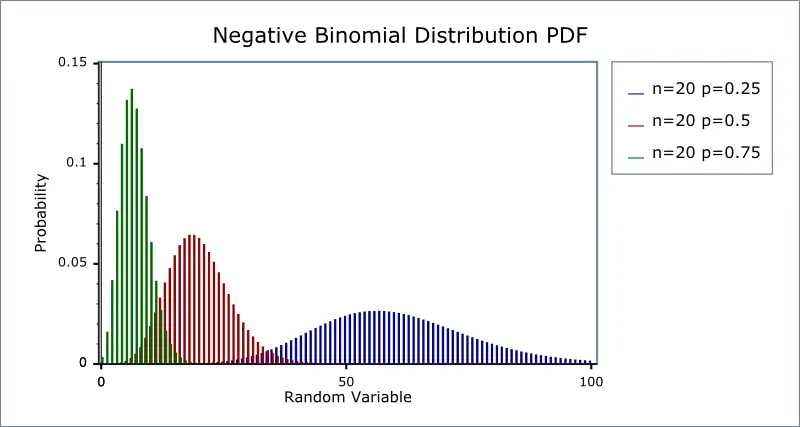

In [ ]:
# Evaluacion en Test
X_test_model = sm.add_constant(X_test[vars_finales], has_constant='add')
y_pred_test = modelo_final.predict(X_test_model)

In [ ]:
# Métricas en test
pseudo_r2_test = 1 - modelo_final.llf / modelo_final.null_deviance
aic_test = modelo_final.aic
bic_test = modelo_final.bic

In [ ]:
# resultados
tabla_resultado = pd.DataFrame({
    'Variable': modelo_final.params.index,
    'Coeficiente': modelo_final.params.values,
    'Error estándar': modelo_final.bse.values,
    'P-valor': modelo_final.pvalues.values
})

In [ ]:
# salidas
print("\n📋 Tabla de coeficientes del mejor modelo (evaluado sobre TEST):\n")
print(tabla_resultado.to_string(index=False))

print("\n📈 Métricas del modelo evaluado en conjunto TEST:")
print(f"AIC: {aic_test:.2f}")
print(f"BIC: {bic_test:.2f}")
print(f"Pseudo-R² (McFadden): {pseudo_r2_test:.4f}")


📋 Tabla de coeficientes del mejor modelo (evaluado sobre TEST):

Variable  Coeficiente  Error estándar      P-valor
   const    -0.100024        0.050429 4.731497e-02
   P_BUS     1.323998        0.124523 2.102743e-26
     LUM    -0.100024        0.050429 4.731497e-02
  P_MOTO     1.442697        0.141666 2.342638e-24
    PVEH     0.436783        0.153215 4.361199e-03
P_CAMION     0.667056        0.144720 4.040336e-06
   RIGID     0.862083        0.173505 6.742286e-07
    CURV    -0.616469        0.194367 1.515636e-03
  INTSEM     0.696648        0.138805 5.197138e-07
   PPEAT     0.671244        0.156274 1.744604e-05
     MIX     0.597190        0.193672 2.045722e-03
    FLEX     0.488648        0.131337 1.987879e-04
    TPDH     0.400932        0.145813 5.966319e-03

📈 Métricas del modelo evaluado en conjunto TEST:
AIC: 14621.12
BIC: -21188.24
Pseudo-R² (McFadden): 3.8909


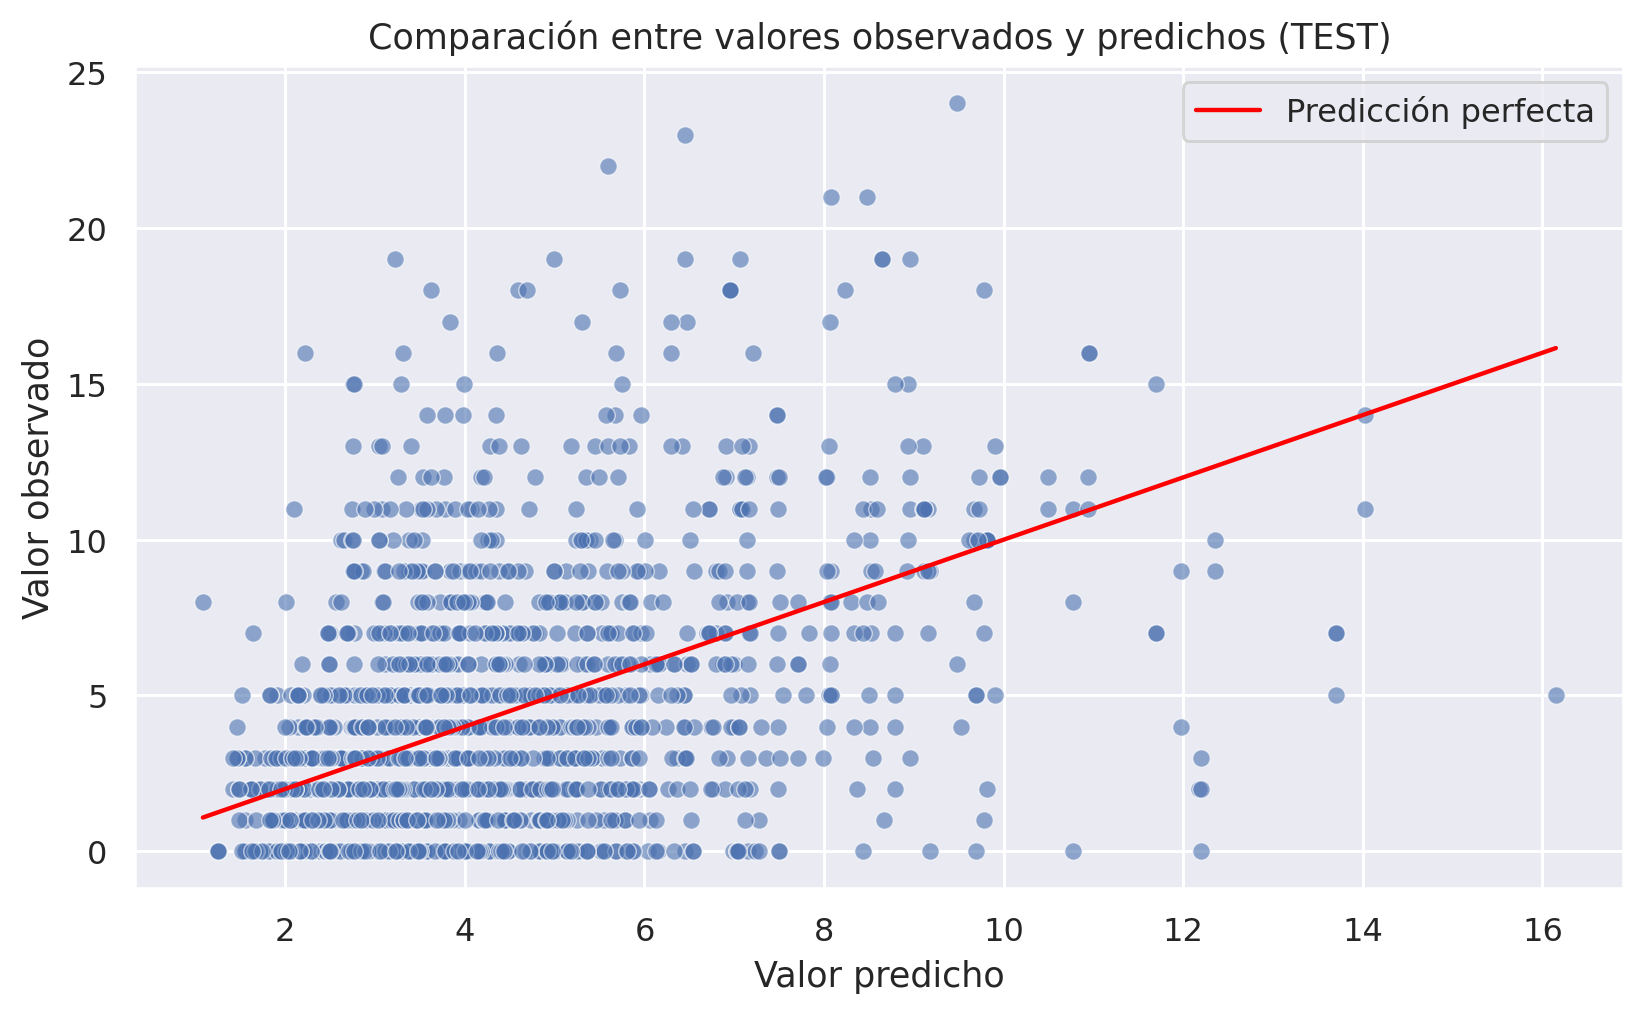

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test, y=y_test, alpha=0.6)
sns.lineplot(x=y_pred_test, y=y_pred_test, color='red', label='Predicción perfecta')
plt.xlabel("Valor predicho")
plt.ylabel("Valor observado")
plt.title("Comparación entre valores observados y predichos (TEST)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

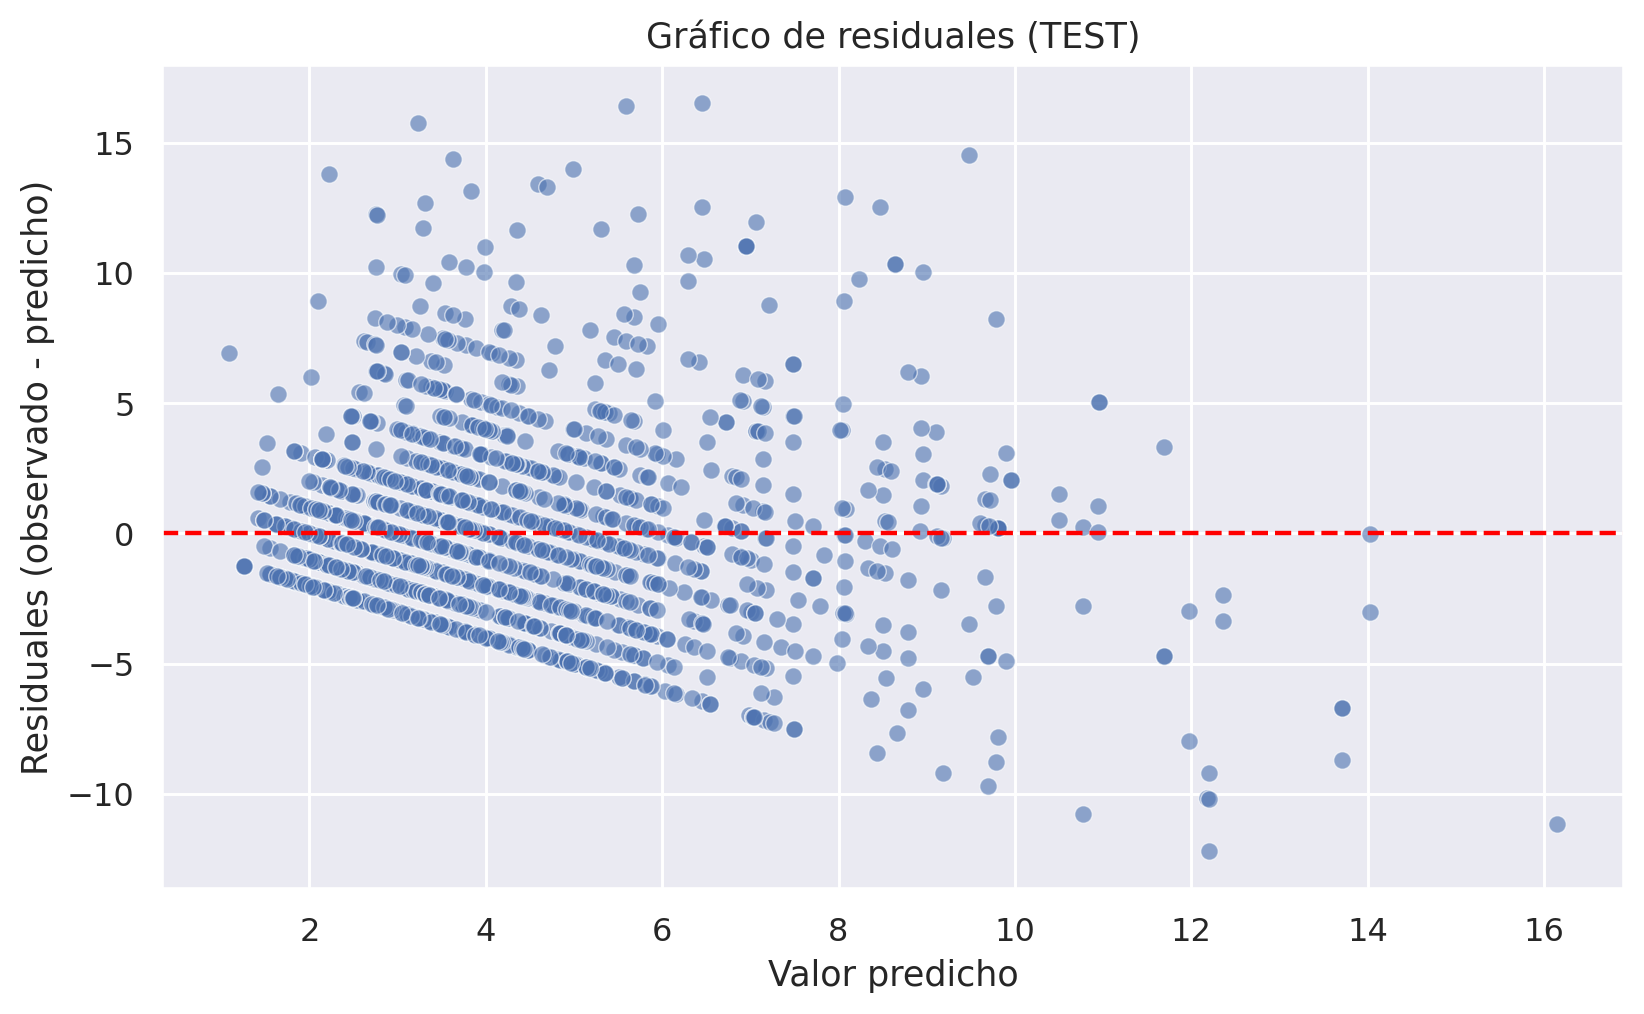

In [ ]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valor predicho")
plt.ylabel("Residuales (observado - predicho)")
plt.title("Gráfico de residuales (TEST)")
plt.grid(True)
plt.tight_layout()
plt.show()

## **5. CONCLUSIONES**

--------------


*   El preprocesamiento de los datos es una etapa esencial en cualquier análisis de siniestralidad, ya que permite limpiar, transformar y normalizar las variables, garantizando que los modelos posteriores se basen en información confiable y comparable. Este proceso también facilita la detección de errores, valores atípicos y patrones relevantes en los datos.

*   La aplicación del Análisis de Componentes Principales (PCA) permite reducir la dimensionalidad del conjunto de datos, identificando las variables que explican la mayor parte de la varianza. Esto es clave para enfocar el análisis en los factores más influyentes sobre los siniestros, simplificando el modelo sin perder información crítica.

*   Dividir los datos en conjuntos de entrenamiento y prueba, junto con el uso de validación cruzada, mejora la calidad de la modelación al reducir el riesgo de sobreajuste. Esta estrategia asegura que los modelos aprendan patrones generalizables y se desempeñen de manera robusta ante nuevos datos, lo que aumenta su utilidad práctica.

*   Los modelos estadísticos aplicados, como la regresión binomial negativa, permiten analizar y predecir la ocurrencia de siniestros considerando la distribución discreta y sobredispersión típica de este tipo de datos. Esto facilita la construcción de funciones de desempeño de seguridad vial más precisas, que son fundamentales para la toma de decisiones y la gestión del riesgo en contextos urbanos.







